## Exercises Linear Regression

In [249]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Exercise 0 - Simulate phone dataset 

In [276]:
#Simulate 400 normally distributed data points with mean = 100 and SD = 100 
np.random.seed(42)
phone_data_x = np.abs(np.random.normal(loc=100, scale=100, size=(400)))
phone_data_error = np.random.normal(loc=0, scale=50, size=(400)) #Simulate 400 normally distributed "error" datapoints with mean = 0 and SD är 50
phone_data_y = 25 + 2 * phone_data_x + phone_data_error

In [277]:
#Create a dataframe
phone_data = pd.DataFrame({"Called Minutes": phone_data_x, "Price": phone_data_y})
phone_data.head()

,Called Minutes,Price
0,149.671415,244.621448
1,86.173570,167.378389
2,164.768854,354.799893
3,252.302986,531.955001
4,76.584663,155.666051


In [278]:
def plot_data(data:pd.DataFrame, title:str, ground_truth=False) -> None:

    fig, ax = plt.subplots(dpi=100)
    sns.scatterplot(data = data, x = "Called Minutes", y = "Price")
    _ = ax.set(xlabel="Called Minutes per Month", ylabel="SEK per Month", title=title)

    if ground_truth:
        line_y = 25 + 2 * data["Called Minutes"]
        _ = sns.lineplot(x=data["Called Minutes"], y=line_y, color="red")        

    plt.show()

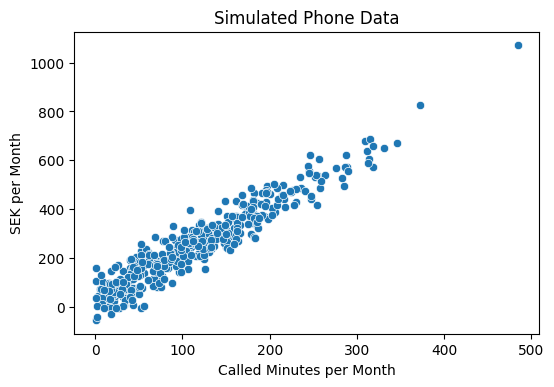

In [279]:
plot_data(phone_data, "Simulated Phone Data")

In [280]:
#Check for outliers in the predictor (x > 300)
phone_data[phone_data["Called Minutes"] > 300].count()

Called Minutes    11
Price             11
dtype: int64

In [281]:
#Check for outliers in the response variable (x < 0)
phone_data[phone_data["Price"] < 0].count()

Called Minutes    8
Price             8
dtype: int64

In [282]:
#Remove the outliers 
phone_data_outliers_rem = phone_data[(phone_data["Called Minutes"] <= 300) & (phone_data["Price"] >= 0)]
len(phone_data_outliers_rem)

381

In [283]:
phone_data_outliers_rem.head()

,Called Minutes,Price
0,149.671415,244.621448
1,86.173570,167.378389
2,164.768854,354.799893
3,252.302986,531.955001
4,76.584663,155.666051


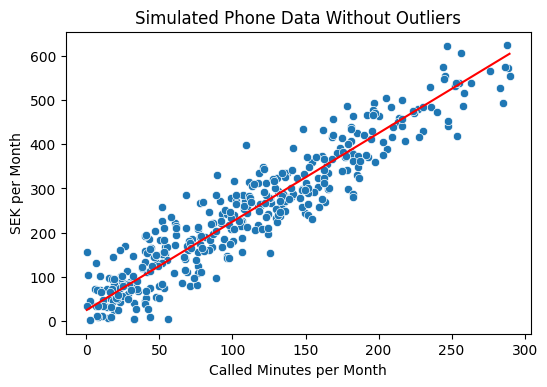

In [285]:
plot_data(phone_data_outliers_rem, ground_truth=True, title="Simulated Phone Data Without Outliers")

### Exercise 1 - Train|test split 

In [377]:
def train_test_split(X:pd.DataFrame, y:pd.DataFrame, train_fraction:float=.7, random_state:int=42, replace:bool=False) -> tuple:
    
    train_fraction = int(len(X) * train_fraction)

    X_train = X.sample(n=train_fraction, random_state=random_state, replace=replace) #random_state is the seed (so we will get the same numbers for both X and y)
    X_test = X.drop(X_train.index) #Drop all of the indexes that are in the X_train data
    
    y_train = y.sample(n=train_fraction, random_state=random_state, replace=replace)
    y_test = y.drop(y_train.index) #Drop all of the indexes that are in the y_train data
    
    return X_train, X_test, y_train, y_test

In [287]:
X_train, X_test, y_train, y_test = train_test_split(phone_data_outliers_rem["Called Minutes"], phone_data_outliers_rem["Price"])

In [383]:
X_train.head()

277     39.978312
196     11.614256
46      53.936123
55     193.128012
57      69.078762
Name: Called Minutes, dtype: float64

In [384]:
y_train.head()

277    192.570147
196     34.734766
46     151.202158
55     371.612382
57     111.395409
Name: Price, dtype: float64

In [288]:
#Checking so there are no matching indexes
print(X_test.index.isin(X_train.index).sum())
print(y_test.index.isin(y_train.index).sum())

0
0


In [289]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))
print(len(X_train) + len(X_test))

266
115
266
115
381


### Exercise 2 - Simple linear regression with normal equation

In [290]:
def prediction_model(x_value):
    
    beta_1, beta_0 = np.polyfit(X_train, y_train, deg = 1) #degree 1 is simple linear regression
    predicted_value = beta_0 + beta_1 * x_value
    
    return predicted_value

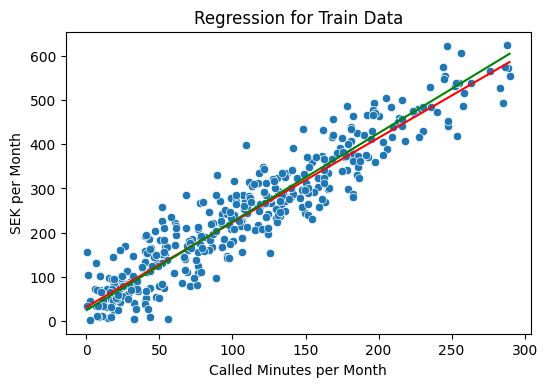

In [297]:
predicted_price_train_data = [prediction_model(data_point) for data_point in X_train]
line_y_ground_truth = 25 + 2 * X_train

fig, ax = plt.subplots(dpi=100)
sns.scatterplot(data = phone_data_outliers_rem, x = "Called Minutes", y = "Price")
_ = ax.set(xlabel="Called Minutes per Month", ylabel="SEK per Month", title="Regression for Train Data")
_ = sns.lineplot(x=X_train, y=predicted_price_train_data, color="red")
_ = sns.lineplot(x=X_train, y=line_y_ground_truth, color="green")

### Exercise 3 - Prediction and evaluation

In [298]:
# Make predictions for the test data 
predicted_price_test_data = [prediction_model(data_point) for data_point in X_test]

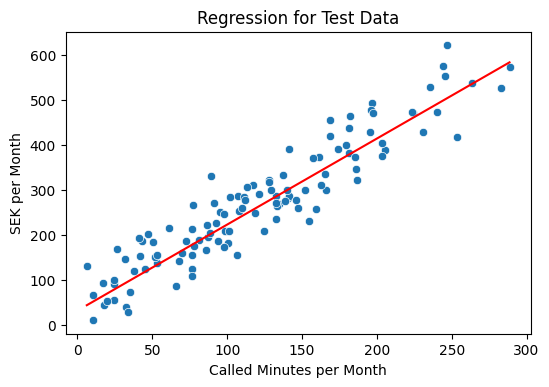

In [299]:
fig, ax = plt.subplots(dpi=100)
sns.scatterplot(x=X_test, y=y_test)
_ = ax.set(xlabel="Called Minutes per Month", ylabel="SEK per Month", title="Regression for Test Data")
_ = sns.lineplot(x=X_test, y=predicted_price_test_data, color="red")

In [301]:
real_and_predictions = pd.DataFrame({"Real value":y_test, "Predicted value":predicted_price_test_data})
real_and_predictions.head()

,Real value,Predicted value
1,167.378389,196.856592
4,155.666051,178.536928
8,137.119904,133.578710
13,271.539890,206.704208
14,186.599267,170.717458


In [305]:
MAE = 1 / len(real_and_predictions) * np.sum(np.abs(real_and_predictions["Real value"] - real_and_predictions["Predicted value"]))
MSE = 1 / len(real_and_predictions) * np.sum((real_and_predictions["Real value"] - real_and_predictions["Predicted value"]) ** 2)
RMSE = np.sqrt(MSE)

print(f"Mean absolute error on testing data: {MAE:.2f} SEK.")
print(f"Mean squared error on testing data: {MSE:.2f}.")    
print(f"Root mean squared error on testing data: {RMSE:.2f} SEK.")    

Mean absolute error on testing data: 40.12 SEK.
Mean squared error on testing data: 2401.58.
Root mean squared error on testing data: 49.01 SEK.


### Exercise 4 - Simulate more explanatory variables 

In [365]:
#Simulate normally distributed data points  
def simulate_data(size):
    np.random.seed(42)
    x1_minutes_of_calls = np.abs(np.random.normal(loc=100, scale=100, size=(size)))
    x2_number_of_sms = np.random.randint(low=0, high=51, size=(size))
    x3_used_GB = np.abs(np.random.normal(loc=0, scale=2, size=(size)))
    error = np.random.normal(loc=0, scale=50, size=(size))
    y_total_cost = 25 + (2 * x1_minutes_of_calls) + (0.5 * x2_number_of_sms) + (50 * x3_used_GB) + error

    phone_data = pd.DataFrame({"Intercept" : np.ones(size),
                                "Minutes of calls" : x1_minutes_of_calls, 
                                "Number of sms" : x2_number_of_sms, 
                                "Used GB" : x3_used_GB,
                                "Total cost": y_total_cost
                                })

    return phone_data

In [366]:
phone_data_mult = simulate_data(10000)
phone_data_mult.head()

,Intercept,Minutes of calls,Number of sms,Used GB,Total cost
0,1.0,149.671415,41,2.208350,494.352864
1,1.0,86.173570,16,1.026793,329.453255
2,1.0,164.768854,30,0.412271,458.010458
3,1.0,252.302986,33,0.004223,527.052669
4,1.0,76.584663,37,1.496144,323.298123


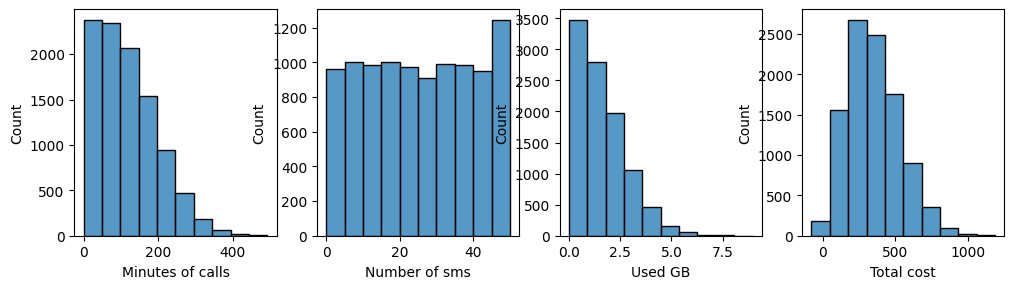

In [367]:
fig, ax = plt.subplots(1, 4, figsize=(12, 3), dpi=100)

for i, feature in enumerate(phone_data_mult.columns[1:5]):
  sns.histplot(data = phone_data_mult[feature], bins=10, ax = ax[i])

In [371]:
phone_data_mult[phone_data_mult["Minutes of calls"] >= 300].count()

Intercept           237
Minutes of calls    237
Number of sms       237
Used GB             237
Total cost          237
dtype: int64

In [372]:
phone_data_mult[phone_data_mult["Used GB"] >= 4].count()

Intercept           421
Minutes of calls    421
Number of sms       421
Used GB             421
Total cost          421
dtype: int64

In [374]:
phone_data_mult[phone_data_mult["Total cost"] <= 0].count()

Intercept           32
Minutes of calls    32
Number of sms       32
Used GB             32
Total cost          32
dtype: int64

In [375]:
#Remove the outliers 
phone_data_mult_outliers_rem = phone_data_mult[(phone_data_mult["Minutes of calls"] < 300) & 
                                                (phone_data_mult["Used GB"] < 4) &
                                                (phone_data_mult["Total cost"] > 0)]
len(phone_data_mult_outliers_rem)

9321

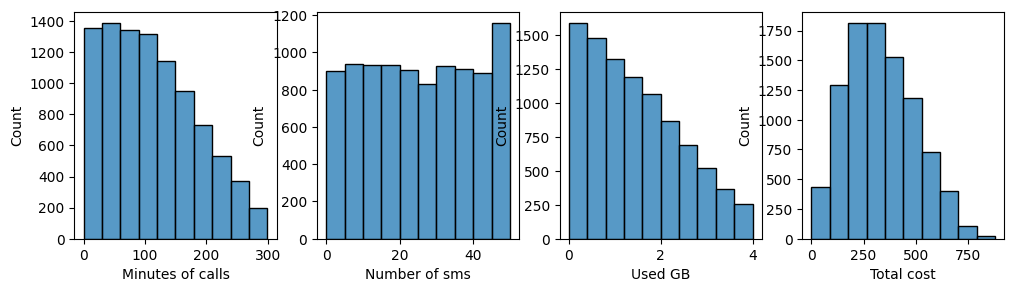

In [376]:
fig, ax = plt.subplots(1, 4, figsize=(12, 3), dpi=100)

for i, feature in enumerate(phone_data_mult_outliers_rem.columns[1:5]):
  sns.histplot(data = phone_data_mult_outliers_rem[feature], bins=10, ax = ax[i])

### Exercise 5 - Multiple linear regression 

In [388]:
def train_test_split_for_dataframe(data:pd.DataFrame, train_fraction:float=.8, random_state:int=42, replace:bool=False) -> tuple:
    
    train_fraction = int(len(data) * train_fraction)

    train = data.sample(n=train_fraction, random_state=random_state, replace=replace)
    test = data.drop(train.index) #Drop all of the indexes that are in the X_train data
    
    return train, test

In [392]:
train_data, test_data = train_test_split_for_dataframe(phone_data_mult_outliers_rem)


In [393]:
train_data

,Intercept,Minutes of calls,Number of sms,Used GB,Total cost
1636,1.0,4.487742,13,0.732655,102.998562
6438,1.0,150.533715,26,0.673785,357.168999
7640,1.0,106.837572,22,2.549020,289.679256
1035,1.0,257.398676,7,1.999982,709.446917
2986,1.0,87.729107,10,3.731680,536.369592
...,...,...,...,...,...
2845,1.0,9.730253,39,0.424469,106.973800
292,1.0,41.063524,30,1.085727,242.554334
681,1.0,12.905177,37,1.296746,116.838810
8377,1.0,7.173416,29,1.578445,100.731279


In [394]:
test_data

,Intercept,Minutes of calls,Number of sms,Used GB,Total cost
1,1.0,86.173570,16,1.026793,329.453255
2,1.0,164.768854,30,0.412271,458.010458
4,1.0,76.584663,37,1.496144,323.298123
5,1.0,76.586304,36,0.148504,216.036377
9,1.0,154.256004,34,2.553236,499.872433
...,...,...,...,...,...
9981,1.0,49.627766,24,1.424857,163.325176
9986,1.0,62.853798,14,0.689899,127.400065
9987,1.0,77.598225,41,3.653821,378.445022
9990,1.0,243.362502,38,0.135028,534.323522


In [396]:
#Checking so there are no matching indexes
print(test_data.index.isin(train_data.index).sum())
print(len(test_data) + len(train_data))

0
9321
